In [78]:
# Medical Insurance Cost Prediction using Machine Learning
# Here we are going to build a Machine Learning System to predict Medical Insurance cost of a person

# Let's say there is a Medical Insurance company and this company wants to create an automatic system that can predict what is a medical insurance cost of a person, using the data provided.
# We will follow the standard workflow from getting the dataset to the data analysis and data preprocessing.

# Our model predicts the cost of an insurance correctly for about 84% of time.

# If you can't view the code or it shows some type of error, just download the file and you will be able to view it and run it on your system

In [47]:
# impoerting the dependencies

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

In [2]:
# Loading our datasets

a = pd.read_csv('/content/drive/MyDrive/ML Datasets/insurance.csv')
insurance = pd.DataFrame(a)

In [3]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<ipython-input-79-bed858ab9d7a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['bmi'])


<Axes: xlabel='bmi', ylabel='Density'>

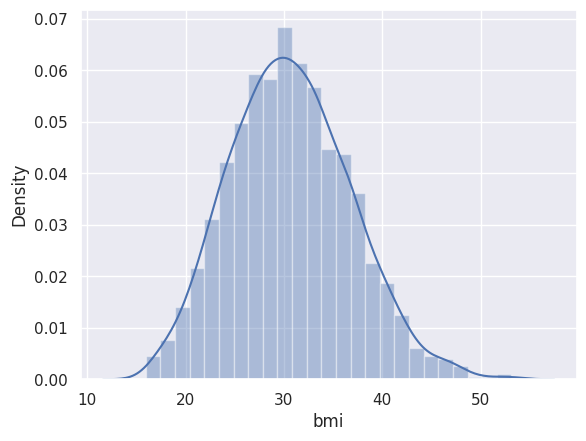

In [79]:
# Looking at the data distribution
# Here we are not going to see data distribution for all the columns cause that would be too lengthy.
# Data distribution for BMI

sns.set()

sns.distplot(insurance['bmi'])

<Axes: xlabel='region', ylabel='count'>

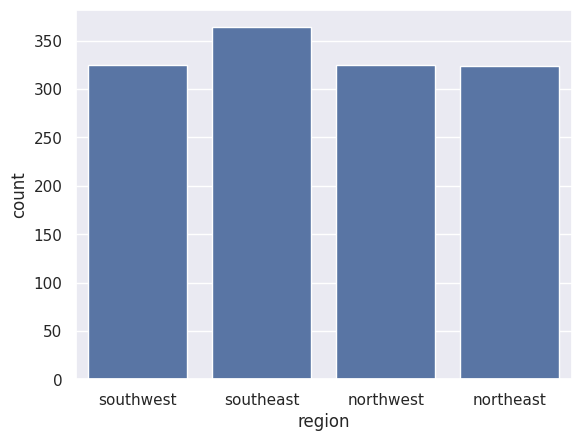

In [15]:
# Data distribution for regions

sns.countplot(data=insurance, x='region')

In [18]:
# Replacing all the categorical values with numerical values so that our Machine Learning Model can understand

insurance['sex'] = insurance['sex'].replace('male',1)
insurance['sex'] = insurance['sex'].replace('female',0)

In [20]:
insurance['smoker'] = insurance['smoker'].replace('yes',1)
insurance['smoker'] = insurance['smoker'].replace('no',0)

In [24]:
insurance['region'] = insurance['region'].replace('southeast',0)
insurance['region'] = insurance['region'].replace('southwest',1)
insurance['region'] = insurance['region'].replace('northwest',2)
insurance['region'] = insurance['region'].replace('northeast',3)

In [27]:
# Splitting the features and labels

X = insurance.drop(columns='charges')

In [29]:
Y = insurance['charges']

In [33]:
# Splitting the data into training and testing data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [36]:
# Standardizing the data

scaler = StandardScaler()

In [37]:
scaler.fit(X_train)

StandardScaler()

In [38]:
X_train = scaler.transform(X_train)

In [39]:
X_test = scaler.transform(X_test)

In [42]:
# Standard Deviation needs to be close to 1 which is achieved here

X_train.std()

1.0

In [43]:
X_test.std()

1.0201701476342677

In [45]:
# Importing our model for training

model = RandomForestRegressor()

In [46]:
model.fit(X_train, Y_train)

RandomForestRegressor()

In [49]:
X_train_prediction = model.predict(X_train)
r_squared = metrics.r2_score(Y_train, X_train_prediction)

print(r_squared)

0.9775570238791587


In [50]:
X_test_prediction = model.predict(X_test)
r_squared = metrics.r2_score(Y_test, X_test_prediction)

print(r_squared)

0.8374918720321954


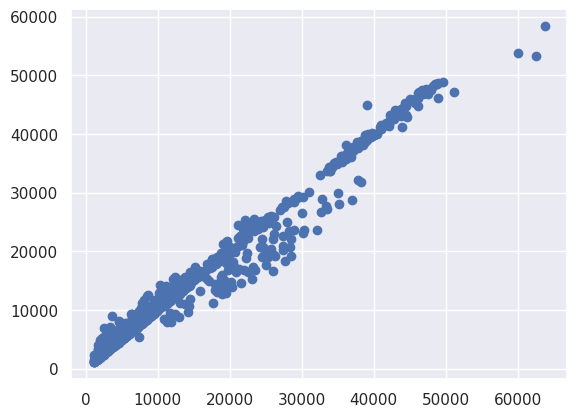

In [51]:
# Training data prediction
# Looking at our prediciton visually and we can see that our prediction has been on point

plt.scatter(Y_train, X_train_prediction)

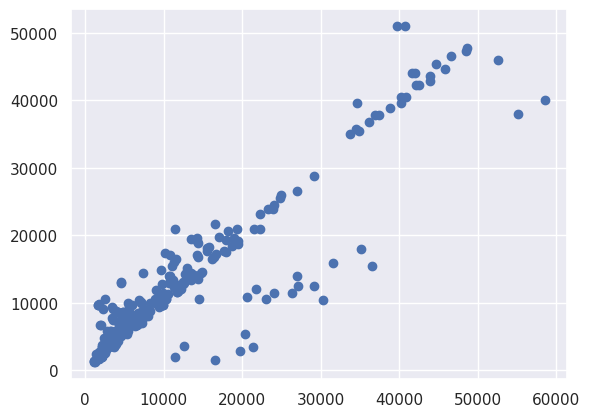

In [52]:
# Testing data prediction
# Looking at our prediciton visually and we can see that our prediction has been on point

plt.scatter(Y_test, X_test_prediction)

In [53]:
# Giving our own data and letting our Model predict the outcomes, which it does successfully 83% of times.

In [72]:
input_data = (56,0,39.82,0,0,0)

In [73]:
input_data_numpy = np.asarray(input_data)

In [74]:
input_data_reshape = input_data_numpy.reshape(1,-1)

In [75]:
std = scaler.transform(input_data_reshape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [76]:
prediction = model.predict(std)

In [77]:
print('The cost of insurance is:- $',prediction[0])

The cost of insurance is:- $ 11316.18985199999
